In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
[9 0 0]


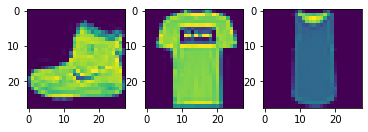

In [8]:
# 이미지 데이터 가져오기
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터 형태 확인
print(train_images.shape)
print(train_labels)
print(test_images.shape)

# 이미지 형태로 확인
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])

# 상위 3개 이미지의 레이블을 출력한다.
print("상위3개", train_labels[:3])


In [17]:
# 모델 초기화
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),  # ㄷ나층
    keras.layers.Dense(10, activation='softmax')
])

# 옵티마이저 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습
model.fit(train_images, train_labels, epochs=100)  # 학습횟수 5

# 손실율 확인
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("정확도", np.round(test_acc * 100, 2), '%')


Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 3.2251 - accuracy: 0.6905
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7051 - accuracy: 0.7358
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6182 - accuracy: 0.7692
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5864 - accuracy: 0.7901
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5558 - accuracy: 0.8036
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5333 - accuracy: 0.8141
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5205 - accuracy: 0.8180
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5122 - accuracy: 0.8224
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4961 - accuracy: 0.8297
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - l

1/1 [==============================] - 0s 21ms/step
6
shirt


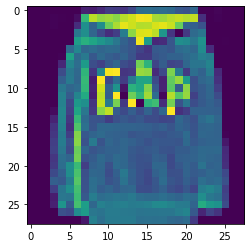

In [41]:
# 렌덤 이미지 가져오기
import numpy as np
r = np.random.randint(0, 1000)
plt.imshow(test_images[r])

# 예측을 위한 형태로 수정
random_clothes = test_images[r][np.newaxis, :, :]

# ^_^
result = model.predict(random_clothes)
result = np.argmax(result)
print(result)

# 옷 이름 리스트
c_name = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
print(c_name[result])